
# Imports

In [1]:
########################## EDA
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud

########################## Preprecessing
#import spacy
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

########################## Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import MultinomialNB
from sklearn.naive_bayes  import BernoulliNB
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier

########################## Machine Learning Evaluation
from sklearn.metrics         import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


pd.set_option('max_colwidth', None)

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Read data

In [2]:
df = pd.read_csv("imdb.csv")

df_train = df.sample(frac = 0.8)
  
df_valid = df.drop(df_train.index)

print("Number of documents in training data: %d" % len(df_train))
print("Number of documents in validation data: %d" % len(df_valid))

Number of documents in training data: 20000
Number of documents in validation data: 5000


# EDA
### Target

In [48]:
df.shape

(25000, 2)

In [8]:
df.head(2)

,review,sentiment
0,"For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan ""The Skipper"" Hale jr. as a police Sgt.",0
1,"Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's ""Flamingo Road"") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of ""Rosemary's Baby"" and ""The Exorcist""--but what a combination! Based on the best-seller by Jeffrey Konvitz, ""The Sentinel"" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat ending with skill. ***1/2 from ****",0


C:\Users\T430\anaconda3\envs\strive\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

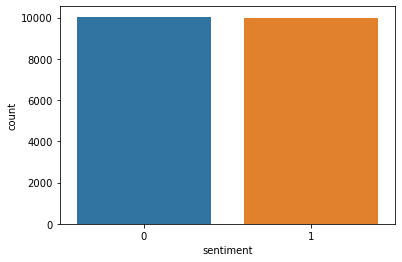

In [9]:
sb.countplot(df_train['sentiment'])

### Text

In [13]:
positive = df[df['sentiment']==0]['review']
negative = df[df['sentiment']==1]['review']

CPU times: total: 34.4 s
Wall time: 36 s


Text(0.5, 1.0, 'Negative')

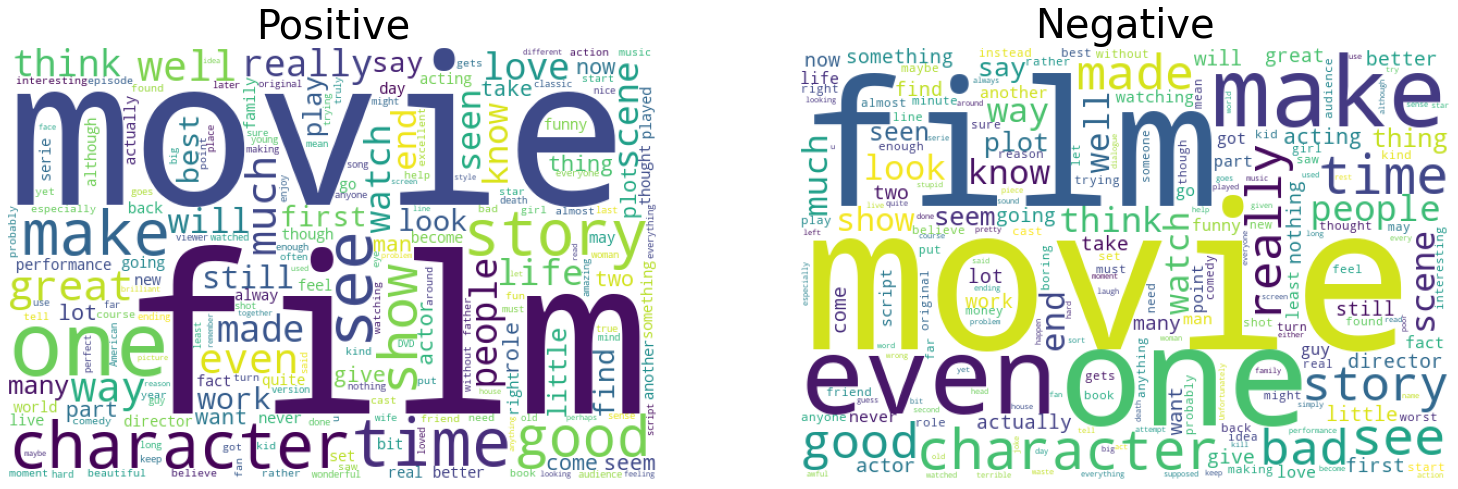

In [14]:
%%time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(positive))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Positive', fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(negative))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Negative',fontsize=40);

# NLP Preprocessing

Before we start with any NLP project we need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Some of the basic text pre-processing techniques includes:

- Make text all **lower case** or **upper case** so that the algorithm does not treat the same words in different cases as different
- **Removing Noise** i.e everything that isn’t in a standard number or letter i.e Punctuation, Numerical values, common non-sensical text (/n)
- **Tokenization**: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want. Sentence tokenizer can be used to find the list of sentences and Word tokenizer can be used to find the list of words in strings.
- **Stopword Removal**: Sometimes, some extremely common words which would appear to be of little value in helping select documents matching a user need are excluded from the vocabulary entirely. These words are called stop words

### More data cleaning steps after tokenization:
- **Stemming**: Stemming is the process of reducing inflected (or sometimes derived) words to their stem, base or root form — generally a written word form. Example if we were to stem the following words: “Stems”, “Stemming”, “Stemmed”, “and Stemtization”, the result would be a single word “stem”.
- **Lemmatization**: A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. Examples of Lemmatization are that “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.
- **Parts of speech** tagging
- Create **bi-grams** or tri-grams And more...

However, it is not necessary that you would need to use all these steps. The usage depends on your problem at hand. Sometimes removal of stop words helps while at other times, this might not help.Here is a nice table taken from the blog titled: [All you need to know about Text Preprocessing for Machine Learning & NLP](https://kavita-ganesan.com/text-preprocessing-tutorial) that summarizes how much preprocessing you should be performing on your text data:

# <center> Toy Example

In [15]:
texts = [
    'Hello this is an sentence',
    'Hello this is another sentence',
    'Hello Hello Hello, this is mellow'
]

### Bag Of Words (BOW)

In [29]:
# create a CountVectorizer instance
# fit tranform the text with it
# get the features+

bow = CountVectorizer()
texts_bow = bow.fit_transform(texts)
tokens=bow.get_feature_names_out()
pd.DataFrame(data=texts_bow.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)

,an,another,hello,is,mellow,sentence,this
Text 1,1,0,1,1,0,1,1
Text 2,0,1,1,1,0,1,1
Text 3,0,0,3,1,1,0,1


### Bag Of Words (BOW) + ngram

In [31]:
#do the same approach but using a range in the count vectorizer
bow = CountVectorizer(ngram_range=(1,2))
texts_bow = bow.fit_transform(texts)
tokens=bow.get_feature_names_out()
pd.DataFrame(data=texts_bow.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)

,an,an sentence,another,another sentence,hello,hello hello,hello this,is,is an,is another,is mellow,mellow,sentence,this,this is
Text 1,1,1,0,0,1,0,1,1,1,0,0,0,1,1,1
Text 2,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1
Text 3,0,0,0,0,3,2,1,1,0,0,1,1,0,1,1


### TFIDF
A problem with the Bag of Words approach is that highly frequent words start to dominate in the document (e.g. larger score), but may not contain as much “informational content”. Also, it will give more weight to longer documents than shorter documents.

One approach is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized. This approach to scoring is called Term Frequency-Inverse Document Frequency, or TF-IDF for short, where:

- **Term Frequency**: is a scoring of the frequency of the word in the current document.
- **Inverse Document Frequency**: is a scoring of how rare the word is across documents.

In [32]:
bow = TfidfVectorizer()
texts_tfidf = bow.fit_transform(texts)
tokens=bow.get_feature_names_out()

In [33]:
#Same approach for the TfidfVectorizer
pd.DataFrame(data=texts_tfidf.toarray(), index=['Text 1', 'Text 2', "Text 3"], columns=tokens)

,an,another,hello,is,mellow,sentence,this
Text 1,0.617227,0.000000,0.364544,0.364544,0.000000,0.469417,0.364544
Text 2,0.000000,0.617227,0.364544,0.364544,0.000000,0.469417,0.364544
Text 3,0.000000,0.000000,0.805627,0.268542,0.454682,0.000000,0.268542


# <center> Apply to the reviews

In [68]:
X_train, y_train = df_train['review'],df_train['sentiment']
X_val, y_val = df_valid['review'],df_valid['sentiment']

### Bag Of Words 1-gram

In [67]:
%%time
bow_1gram = CountVectorizer()

train_bow_1gram = bow_1gram.fit_transform(X_train)
valid_bow_1gram = bow_1gram.transform(X_val)

CPU times: total: 7.44 s
Wall time: 7.79 s


### Bag Of Words 1-2-grams

In [57]:
%%time
bow_2grams = CountVectorizer(ngram_range=(1,2))
train_bow_2grams = bow_2grams.fit_transform(X_train)
valid_bow_2grams = bow_2grams.transform(X_val)

CPU times: total: 23.9 s
Wall time: 24.6 s


### TFIDF 1-gram

In [58]:
%%time
tfidf_1gram       = TfidfVectorizer()
train_tfidf_1gram = tfidf_1gram.fit_transform(X_train)
valid_tfidf_1gram = tfidf_1gram.transform(X_val)

CPU times: total: 7.22 s
Wall time: 7.36 s


### TFIDF 1-2-grams

In [59]:
%%time
tfidf_2grams      = TfidfVectorizer(ngram_range=(1,2))
train_tfidf_2grams = tfidf_2grams.fit_transform(X_train)
valid_tfidf_2grams = tfidf_2grams.transform(X_val)

CPU times: total: 25.6 s
Wall time: 26.3 s


In [60]:
data = [
    ("BOW 1gram",   train_bow_1gram, valid_bow_1gram),
    ("BOW 2grams",  train_bow_2grams, valid_bow_2grams),
    ("TFIDF 1gram", train_tfidf_1gram, valid_tfidf_1gram),
    ("TFIDF 2grams",train_tfidf_2grams, valid_tfidf_2grams)
]

print("BOW 1gram   ", train_bow_1gram.shape)
print("BOW 2grams  ", train_bow_2grams.shape)
print("TFIDF 1gram ", train_tfidf_1gram.shape)
print("TFIDF 2grams", train_tfidf_2grams.shape)

BOW 1gram    (20000, 68805)
BOW 2grams   (20000, 1304391)
TFIDF 1gram  (20000, 68805)
TFIDF 2grams (20000, 1304391)


In [16]:
data = [
    ("BOW 1gram",   train_bow_1gram, valid_bow_1gram),
    ("BOW 2grams",  train_bow_2grams, valid_bow_2grams),
    ("TFIDF 1gram", train_tfidf_1gram, valid_tfidf_1gram),
    ("TFIDF 2grams",train_tfidf_2grams, valid_tfidf_2grams)
]

print("BOW 1gram   ", train_bow_1gram.shape)
print("BOW 2grams  ", train_bow_2grams.shape)
print("TFIDF 1gram ", train_tfidf_1gram.shape)
print("TFIDF 2grams", train_tfidf_2grams.shape)

BOW 1gram    (25000, 76496)
BOW 2grams   (25000, 1513369)
TFIDF 1gram  (25000, 45185)
TFIDF 2grams (25000, 433699)


# <center> ML Models

## Naive Bayes (<1 s)

In [82]:
for name, x_train, x_valid in data:
    start_time = time.time()
    
    #Train a MultinomialNB model and meassure the time
    model = MultinomialNB()
    model.fit(x_train,y_train)
    t = time.time() - start_time
    a = accuracy_score(y_val, model.predict(x_valid))
    
    print(name, "\tAccuracy:\t", a,"\tTime:\t", t)

BOW 1gram 	Accuracy:	 0.8428 	Time:	 0.048972368240356445
BOW 2grams 	Accuracy:	 0.8786 	Time:	 0.30581068992614746
TFIDF 1gram 	Accuracy:	 0.8588 	Time:	 0.05696463584899902
TFIDF 2grams 	Accuracy:	 0.884 	Time:	 0.2598381042480469


## Logistic Regression (30s)

In [77]:
for name, x_train, x_valid in data:
    #Train a LogisticRegression model and meassure the time
    start_time = time.time()
    log_model= LogisticRegression()
    log_model.fit(x_train,y_train)
    t = time.time() - start_time
    a = accuracy_score(y_val, log_model.predict(x_valid))

    print(name, "\tAccuracy:\t", a, "\tTime:\t", t)

C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BOW 1gram 	Accuracy:	 0.8846 	Time:	 4.006531715393066


C:\Users\T430\anaconda3\envs\strive\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BOW 2grams 	Accuracy:	 0.8962 	Time:	 47.996417760849
TFIDF 1gram 	Accuracy:	 0.8898 	Time:	 1.3371756076812744
TFIDF 2grams 	Accuracy:	 0.8868 	Time:	 33.62327694892883


## Random Forest (10+90+6+22 seconds)

In [83]:
for name, x_train, x_valid in data:
    
    start_time = time.time()
    clf = RandomForestClassifier()
    clf.fit(x_train,y_train)
    t = time.time() - start_time
    a = accuracy_score(y_val, clf.predict(x_valid))

    #Train a RandomForestClassifier model and meassure the time
    print(name, "\tAccuracy:\t", a, "\tTime:\t", t)

BOW 1gram 	Accuracy:	 0.8442 	Time:	 68.05507612228394
BOW 2grams 	Accuracy:	 0.8482 	Time:	 326.9405024051666
TFIDF 1gram 	Accuracy:	 0.8314 	Time:	 60.70658755302429
TFIDF 2grams 	Accuracy:	 0.844 	Time:	 290.44499683380127
